PARTE II

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Cargar los datos
data = pd.read_csv('evaluacion_mkt_campaign.csv')
data.head()

,ID,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
0,5524,58138.0,58,635,546,172,88,88,3,8,10,4,7,58,997,0
1,2174,46344.0,38,11,6,2,1,6,2,1,1,2,5,61,151,2
2,4141,71613.0,26,426,127,111,21,42,1,8,2,10,4,50,498,0
3,6182,26646.0,26,11,20,10,3,5,2,2,0,4,6,31,91,1
4,5324,58293.0,94,173,118,46,27,15,5,5,3,6,5,34,347,1


In [3]:
data.shape

(2216, 16)

In [4]:
# Setear ID como indice
data.set_index('ID', inplace=True)
data.head(5)

,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
ID,,,,,,,,,,,,,,,
5524,58138.0,58,635,546,172,88,88,3,8,10,4,7,58,997,0
2174,46344.0,38,11,6,2,1,6,2,1,1,2,5,61,151,2
4141,71613.0,26,426,127,111,21,42,1,8,2,10,4,50,498,0
6182,26646.0,26,11,20,10,3,5,2,2,0,4,6,31,91,1
5324,58293.0,94,173,118,46,27,15,5,5,3,6,5,34,347,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 5524 to 9405
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2216 non-null   float64
 1   Recency              2216 non-null   int64  
 2   MntWines             2216 non-null   int64  
 3   MntMeatProducts      2216 non-null   int64  
 4   MntFishProducts      2216 non-null   int64  
 5   MntSweetProducts     2216 non-null   int64  
 6   MntGoldProds         2216 non-null   int64  
 7   NumDealsPurchases    2216 non-null   int64  
 8   NumWebPurchases      2216 non-null   int64  
 9   NumCatalogPurchases  2216 non-null   int64  
 10  NumStorePurchases    2216 non-null   int64  
 11  NumWebVisitsMonth    2216 non-null   int64  
 12  Age                  2216 non-null   int64  
 13  Seniority            2216 non-null   int64  
 14  Children             2216 non-null   int64  
dtypes: float64(1), int64(14)
memory usa

In [6]:
data.describe()

,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,46.179603,538.006318,0.947202
std,25173.076661,28.948352,337.327920,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,11.985554,232.469034,0.749062
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,26.000000,0.000000
25%,35303.000000,24.000000,24.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,38.000000,366.000000,0.000000
50%,51381.500000,49.000000,174.500000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,45.000000,539.000000,1.000000
75%,68522.000000,74.000000,505.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,56.000000,712.000000,1.000000
max,666666.000000,99.000000,1493.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,122.000000,1089.000000,3.000000


Búsqueda de Anomalías: Usando las columnas de comportamiento de compra, encuentre 
registros anómalos correspondientes al 5% de la muestra, y descártelos.
Feature Extraction: Usando los datos filtrados reduzca el numero de variables. Busque una 
representación que le permita explicar un 90% de la varianza original de los datos.

In [7]:
# Seleccionar las columnas de comportamiento de compra
columnas_compras = ['NumDealsPurchases','NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']
data[columnas_compras].describe()


,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumCatalogPurchases
count,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.323556,5.800993,4.085289,2.671029
std,1.923716,3.250785,2.740951,2.926734
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2.000000,0.000000
50%,2.000000,5.000000,4.000000,2.000000
75%,3.000000,8.000000,6.000000,4.000000
max,15.000000,13.000000,27.000000,28.000000


In [8]:
# sumar las columans de compras
data['TotalPurchases'] = data[columnas_compras].sum(axis=1)
data['TotalPurchases'].describe()

count    2216.000000
mean       14.880866
std         7.670957
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: TotalPurchases, dtype: float64

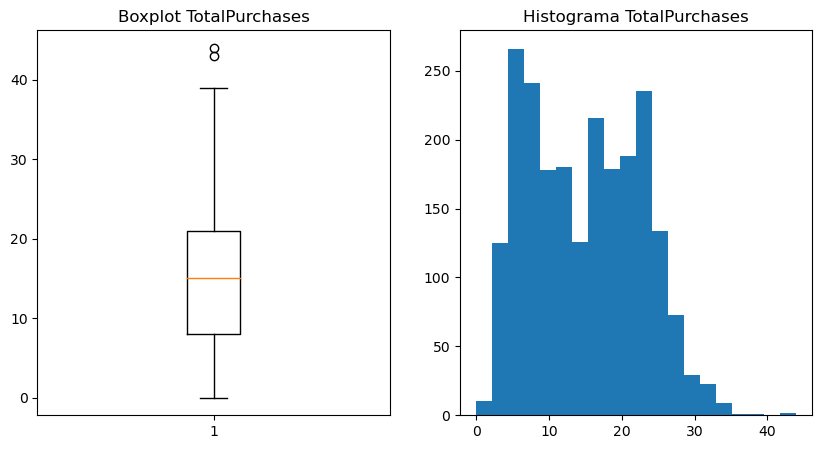

In [9]:
# graficar boxplot de TotalPurchases y histograma
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(data['TotalPurchases'])
axs[0].set_title('Boxplot TotalPurchases')
axs[1].hist(data['TotalPurchases'], bins=20)
axs[1].set_title('Histograma TotalPurchases')
plt.show()

In [10]:
#filtrar el 5% de datos anomalos de TotalPurchases
q = data['TotalPurchases'].quantile(0.95)
data_filtrado = data[data['TotalPurchases'] < q]
data_filtrado

,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children,TotalPurchases
ID,,,,,,,,,,,,,,,,
5524,58138.0,58,635,546,172,88,88,3,8,10,4,7,58,997,0,25
2174,46344.0,38,11,6,2,1,6,2,1,1,2,5,61,151,2,6
4141,71613.0,26,426,127,111,21,42,1,8,2,10,4,50,498,0,21
6182,26646.0,26,11,20,10,3,5,2,2,0,4,6,31,91,1,8
5324,58293.0,94,173,118,46,27,15,5,5,3,6,5,34,347,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,61223.0,46,709,182,42,118,247,2,9,3,4,5,48,567,1,18
4001,64014.0,56,406,30,0,0,8,7,8,2,5,7,69,87,3,22
7270,56981.0,91,908,217,32,12,24,1,2,3,13,6,34,341,0,19


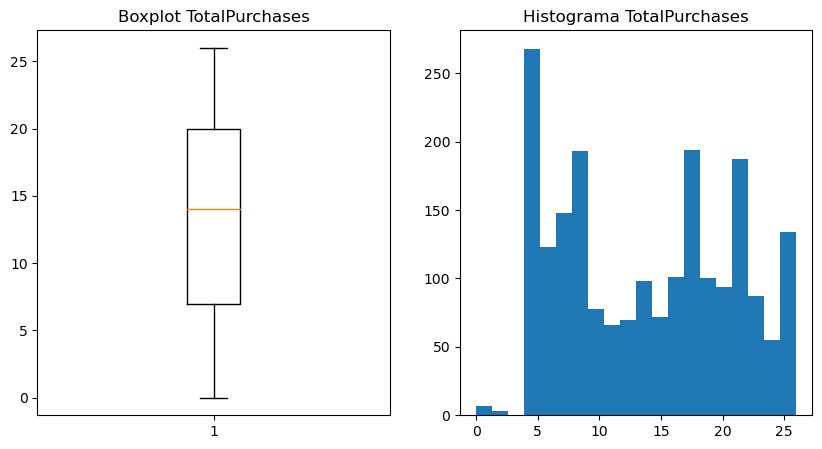

In [11]:
# graficar boxplot de TotalPurchases y histograma
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(data_filtrado['TotalPurchases'])
axs[0].set_title('Boxplot TotalPurchases')
axs[1].hist(data_filtrado['TotalPurchases'], bins=20)
axs[1].set_title('Histograma TotalPurchases')
plt.show()

In [12]:
# genear X con drop de TotalPurchases, Income
X = data_filtrado.drop(['TotalPurchases', 'Income'], axis=1)
y = data_filtrado['Income']

In [13]:
# estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.30433126,  1.08431224,  1.8112294 , ...,  0.99423037,
         2.0079743 , -1.26483491],
       [-0.38587377, -0.82908047, -0.70132677, ...,  1.24412079,
        -1.64207039,  1.38870062],
       [-0.79999679,  0.44344833, -0.13832807, ...,  0.32785591,
        -0.14494804, -1.26483491],
       ...,
       [ 1.44316957,  1.92142155,  0.28043129, ..., -1.004893  ,
        -0.8223204 , -1.26483491],
       [-1.42118133,  0.449581  ,  0.26647264, ...,  1.07752718,
        -0.81800593,  0.06193286],
       [-0.31685327, -0.60523806, -0.44541827, ...,  1.24412079,
         1.19253878,  1.38870062]])

In [14]:
pca = PCA(n_components=0.9)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

n_components = X_pca.shape[1]

print(f'Number of components: {n_components}')
print(f'Explained variance: {pca.explained_variance_ratio_.sum()}')

Number of components: 10
Explained variance: 0.9177784955020832


Clustering:
a) Usando los resultados anteriores clusterice el comportamiento de sus clientes. El área de 
marketing solicitó que el número de clusters sea no mayor a 8. Encuentre el número óptimo de 
clusters considerando esa restricción
b) Reporte los centroides de cada cluster en términos de las variables originales. Interprete.

In [15]:
# import k-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
# Determine cuántos k o clúster son adecuados

# SSE scores
sse_scores = []

# Perform k-means clustering for k values from 2 to 8
k_values = range(2, 8)
silhouette_scores=[]
for k in k_values:

    # Fit the k-means model
    kmeans = KMeans(
        n_clusters=k,
        n_init='auto',
        random_state=42
    )

    kmeans.fit(X)
    
    # Compute SSE (inertia)
    sse = kmeans.inertia_
    sse_scores.append(sse)

    # Calculate Silhouette score
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

c:\Users\Polette\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Polette\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Polette\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Polette\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak o

Text(0.5, 1.0, 'Elbow Method: Silhouette Score')

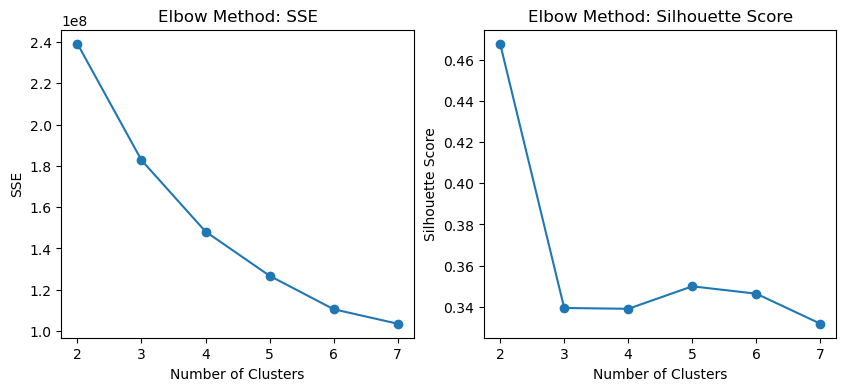

In [17]:
# grafico de los resultados

# Plot SSE and silhouette scores
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(k_values, sse_scores, marker='o')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('SSE')
ax[0].set_title('Elbow Method: SSE')

ax[1].plot(k_values, silhouette_scores, marker='o')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Elbow Method: Silhouette Score')


In [18]:
# segun lo anterior el numero optimo de clusters es 3

# Aplicar el algoritmo de k-means

k = 3 # numero de clusters

kmeans = KMeans(
    n_clusters=k,
    n_init='auto',
    random_state=42
)
kmeans.fit(X) # entrenamos el modelo

c:\Users\Polette\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=42)

c:\Users\Polette\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Polette\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


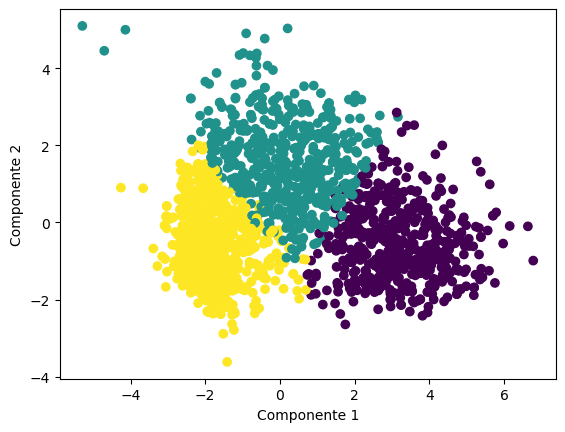

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_
labels

# graficar los clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

In [20]:
#  Reporte los centroides de cada cluster en términos de las variables originales. Interprete.

# Centroides
centroides = kmeans.cluster_centers_ # coordenadas de los centroides

# Inverse transform
# transformamos los centroides a las variables originales para interpretar
centroides_inv = pca.inverse_transform(centroides) 
centroides_inv

array([[ 1.27041658e-04,  9.78632443e-01,  1.30482589e+00,
         1.18088644e+00,  1.09743814e+00,  6.80470766e-01,
        -5.88771360e-01,  4.36736922e-01,  1.25264357e+00,
         8.75386166e-01, -1.08619839e+00,  8.22572533e-02,
        -2.54272056e-02, -9.90111694e-01],
       [ 1.17611556e-02,  3.91219352e-01, -1.47821120e-01,
        -1.79520502e-01, -1.77267324e-01,  3.14412673e-01,
         9.53293154e-01,  8.78164193e-01,  2.88895429e-02,
         5.02915881e-01,  3.97438679e-01,  2.79183572e-01,
         3.30400237e-01,  3.77009747e-01],
       [-6.61355429e-03, -7.59129834e-01, -6.39719938e-01,
        -5.53508501e-01, -5.08590147e-01, -5.51426104e-01,
        -2.04593155e-01, -7.30208731e-01, -7.09159609e-01,
        -7.64145546e-01,  3.79879926e-01, -2.00835331e-01,
        -1.69747718e-01,  3.38080743e-01]])

In [21]:
# Interpretacion de los centroides
centroides_inv = pd.DataFrame(centroides_inv, columns=X.columns)
centroides_inv



,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
0,0.000127,0.978632,1.304826,1.180886,1.097438,0.680471,-0.588771,0.436737,1.252644,0.875386,-1.086198,0.082257,-0.025427,-0.990112
1,0.011761,0.391219,-0.147821,-0.179521,-0.177267,0.314413,0.953293,0.878164,0.028890,0.502916,0.397439,0.279184,0.330400,0.377010
2,-0.006614,-0.759130,-0.639720,-0.553509,-0.508590,-0.551426,-0.204593,-0.730209,-0.709160,-0.764146,0.379880,-0.200835,-0.169748,0.338081


In [22]:
# obetenier los centroides maximos de cada cluster
centroides_inv.idxmax(axis=1)

# imprimir los centroides maximos de cada cluster con su valor maximo absoluto
for i in range(3):
    print(f'Cluster {i+1}: {centroides_inv.idxmax(axis=1)[i]} = {centroides_inv.max(axis=1)[i]}')
    

Cluster 1: MntMeatProducts = 1.3048258943778692
Cluster 2: NumDealsPurchases = 0.9532931537813633
Cluster 3: NumWebVisitsMonth = 0.37987992567079487


In [23]:
# Interpretacion de los resultados

# Cluster 1: MntMeatProducts, Los clientes asignados a este cluster tienen una preferencia notable por los 
# productos de carne y es probable que sean consumidores frecuentes de estos productos.

# Cluster 2: NumDealsPurchases, Los clientes son propensos a realizar compras aprovechando descuentos y 
# ofertas especiales. Es posible que sean más sensibles al precio y busquen oportunidades para ahorrar en sus compras.

# Cluster 3: NumWebVisitsMonth, Los clientes muestran una alta actividad en línea y visitan el sitio web con frecuencia. 
# Pueden estar interesados en obtener información sobre productos, comparar precios o realizar compras en línea.